# Project 2 - Two-mode Network Dataset (DATA 620) 
## Topic: Baseball player steroid use
#### Authors: John Mazon, LeTicia Cancel, Bharani Nitalla

Video: https://www.youtube.com/watch?v=m0lWKqD4fO0

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import matplotlib

### Description of Dataset:

Two networks representing steroid use among baseball players. First, a bipartite network of players and their steroid providers (of illegal performance-enhancing substances). Second, a one-mode projection of players, which are linked if they have a common
supplier.

The List of Major League Baseball players named in the Mitchell Report includes active and former Major League players as well as free agents. The Mitchell Report is the result of former US Senator George J. Mitchell's (D–ME) 20-month investigation into performance-enhancing drug use in Major League Baseball (MLB). It was released December 13, 2007.

The following is a list of the Major League Baseball players named in the Mitchell Report.[1][2][3][4][5] Inclusion on the list does not necessarily mean the player was involved in illegal activity. In some instances, insufficient evidence was provided to draw a conclusion, and some players were mentioned in other contexts.

### Background info
Social network analysis [SNA] is the mapping and measuring of relationships and flows between people, groups, organizations, computers, URLs, and other connected information/knowledge entities. The nodes in the network are the people and groups while the links show relationships or flows between the nodes. SNA provides both a visual and a mathematical analysis of human relationships. 

When the Mitchell Report, on steroid use in Major League Baseball [MLB], was published people were surprised at both the number and names of those who were mentioned. The diagram below shows a network map created from data found in the Mitchell Report. Baseball players are shown as well as those who were found to be providers of steroids and other illegal performance enhancing substances appear. The links reveal the flow of chemicals -- from providers to players.



# Section 1 - importing the data

In [2]:
#reading csv files
df_edges = pd.read_csv('band.csv/edges.csv')
df_nodes = pd.read_csv('band.csv/nodes.csv')

In [3]:
df_nodes

,# index,name,_pos
0,0,BALCO,"array([ 0.42916385, -1.06252603])"
1,1,Greg_Anderson,"array([ 0.92099285, -0.80835392])"
2,2,Palm_Beach_Rejuvenation_Centre,"array([-0.4604673 , -2.28633679])"
3,3,New_Hope_Health_Centre,"array([ 0.97088245, -4.86546354])"
4,4,Signature_Pharmacy,"array([-0.30669722, -3.17679839])"
...,...,...,...
79,79,Mike_Bell,"array([ 2.47275041, -3.19814548])"
80,80,Bart_Miadich,"array([ 2.13836021, -2.33889511])"
81,81,Jim_Parque,"array([ 2.71360296, -3.34106552])"
82,82,Phil_Hiatt,"array([ 2.92429591, -3.42093518])"


The BALCO scandal was a scandal involving the use of banned, performance-enhancing substances by professional athletes. The Bay Area Laboratory Co-operative (BALCO) was a San Francisco Bay Area business which supplied anabolic steroids to professional athletes. The incident surrounds a 2002 US federal government investigation of the laboratory.

According to the Mitchell Report on doping in baseball, the Palm Beach Rejuvenation Center supplied human growth hormone and steroids to several baseball players, including Cleveland Indians pitcher Paul Byrd, who bought nearly $25,000 worth of HGH in 13 transactions between August 2002 and January 2005.

Greg F. Anderson (born February 1966) is an American personal trainer, best known for his work with baseball player Barry Bonds, and links with BALCO.
Anderson allegedly began providing Bonds with performance-enhancing drugs in 1998. He was also linked in this regard to both Jason Giambi and Gary Sheffield, through his connections with Bonds. Despite this information, the San Francisco Giants, allegedly in order to appease Bonds, did not bar Anderson from Giants' facilities. On July 15, 2005, Anderson, in a deal with federal prosecutors, pleaded guilty to conspiracy to distribute steroids and to money-laundering.On October 18, 2005, he was sentenced by U.S. District Court Judge Susan Illston to three months in prison and three months' home confinement.




In [4]:
providers = ["BALCO", "Greg_Anderson", "Palm_Beach_Rejuvenation_Centre", 'New_Hope_Health_Centre', 'Signature_Pharmacy',  'American_Pharmaceutical_Group',
            'Health_Rejuvenation_Centre', 'Applied_Pharmacy_Services', 'Arizona_AntiAging_Clinic', 'Health_Watch_Clinic', 'Glenallen_Hill']
players = list( set(list(df_nodes.iloc[:, 1])) - set(providers) )

In [5]:
df_edges.head()

,# source,target
0,12,0
1,13,0
2,14,0
3,14,1
4,15,0


In [6]:
#initialize graph
G = nx.Graph()
print(df_edges)
print(df_nodes)
#we print the df_edges and df_nodes to visualize better the data

    # source   target
0         12        0
1         13        0
2         14        0
3         14        1
4         15        0
..       ...      ...
79        79       11
80        80       11
81        81       11
82        82       11
83        83       11

[84 rows x 2 columns]
    # index                            name                               _pos
0         0                           BALCO  array([ 0.42916385, -1.06252603])
1         1                   Greg_Anderson  array([ 0.92099285, -0.80835392])
2         2  Palm_Beach_Rejuvenation_Centre  array([-0.4604673 , -2.28633679])
3         3          New_Hope_Health_Centre  array([ 0.97088245, -4.86546354])
4         4              Signature_Pharmacy  array([-0.30669722, -3.17679839])
..      ...                             ...                                ...
79       79                       Mike_Bell  array([ 2.47275041, -3.19814548])
80       80                    Bart_Miadich  array([ 2.13836021, -2.33889511])
81

In [7]:
#find edges
def ObtainEdges(df):
    edges_list = [];
    for index, info in df.iterrows():
        edges_list.append((info[0], info[1]))

    return edges_list

In [8]:
#obtaining from df_edges to input into edges_list
edges_list = ObtainEdges(df_edges)

In [9]:
#print out a portion of the edges list
edges_list[0:10]

[(12, 0),
 (13, 0),
 (14, 0),
 (14, 1),
 (15, 0),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 0)]

In [10]:
#print out a portion of the df_nodes
df_nodes[0:10]

,# index,name,_pos
0,0,BALCO,"array([ 0.42916385, -1.06252603])"
1,1,Greg_Anderson,"array([ 0.92099285, -0.80835392])"
2,2,Palm_Beach_Rejuvenation_Centre,"array([-0.4604673 , -2.28633679])"
3,3,New_Hope_Health_Centre,"array([ 0.97088245, -4.86546354])"
4,4,Signature_Pharmacy,"array([-0.30669722, -3.17679839])"
5,5,American_Pharmaceutical_Group,"array([ 2.95233045, -1.87045357])"
6,6,Health_Rejuvenation_Centre,"array([-0.45673428, -3.93778089])"
7,7,Applied_Pharmacy_Services,"array([ 0.10571343, -3.51182852])"
8,8,Arizona_AntiAging_Clinic,"array([ 0.30421134, -2.92204833])"
9,9,Health_Watch_Clinic,"array([-0.06342055, -3.96214378])"


In [11]:
# find nodes by using obtainAttr () which retrieves or creates the element's attribute
def ObtainAttr(df):
    attr_dict = dict()
    for index, info in df.iterrows():
        attr_dict[info[0]] = info[1];
    return attr_dict

In [12]:
attr_dict= ObtainAttr(df_nodes)

Below is the value combinations of nodes, relating to players and providers

In [13]:
# print first 10 nodes
list(attr_dict.items())[1:10]

[(1, 'Greg_Anderson'),
 (2, 'Palm_Beach_Rejuvenation_Centre'),
 (3, 'New_Hope_Health_Centre'),
 (4, 'Signature_Pharmacy'),
 (5, 'American_Pharmaceutical_Group'),
 (6, 'Health_Rejuvenation_Centre'),
 (7, 'Applied_Pharmacy_Services'),
 (8, 'Arizona_AntiAging_Clinic'),
 (9, 'Health_Watch_Clinic')]

# Section 2 - Part 1 - bipartite networks

To understand networks and their participants, we evaluate the location and grouping of nodes in the network. These measures give us insight into the various roles and groupings in a network -- who are the connectors, bridges, isolates, where are the clusters and who is in them, who is in the core of the network





In [14]:
names_to_id = dict( [(v, k) for (k, v) in attr_dict.items()] )

In [15]:
#Creating a two mode network i.e Bipartite Networks from the above nodes and edges.
#node_1 = list(attr_dict.keys())
#node_2 = list(attr_dict.values())
node_1 = [(names_to_id[k], {"label" : k}) for k in players]
node_2 = [(names_to_id[k], {"label" : k}) for k in providers]
G.add_nodes_from(node_1, bipartite=0)
G.add_nodes_from(node_2, bipartite=1)
# G.add_edges_from(edges_list)
# G.add_nodes_from(attr_dict.values())
G.add_edges_from(edges_list)

In [16]:
len(node_1)

73

In [17]:
attr_dict

{0: 'BALCO',
 1: 'Greg_Anderson',
 2: 'Palm_Beach_Rejuvenation_Centre',
 3: 'New_Hope_Health_Centre',
 4: 'Signature_Pharmacy',
 5: 'American_Pharmaceutical_Group',
 6: 'Health_Rejuvenation_Centre',
 7: 'Applied_Pharmacy_Services',
 8: 'Arizona_AntiAging_Clinic',
 9: 'Health_Watch_Clinic',
 10: 'BrianMcNamee',
 11: 'Kirk_Radomski',
 12: 'Victor_Conte',
 13: 'Jeremy_Giambi',
 14: 'Jason_Giambi',
 15: 'Gary_Sheffield',
 16: 'Bobby_Estalella',
 17: 'Benito_Santiago',
 18: 'Marvin_Bernard',
 19: 'Barry_Bonds',
 20: 'Armando_Rios',
 21: 'Randy_Velarde',
 22: 'Matt_Williams',
 23: 'Daren_Holmes',
 24: 'Paul_Byrd',
 25: 'Jose_Guillen',
 26: 'Ismael_Vaklez',
 27: 'Jason_Grimsley',
 28: 'Troy_Glaus',
 29: 'Scott_Schoeneweis',
 30: 'Steve_Woodward',
 31: 'Gary_MatthewsJr',
 32: 'David_Bell',
 33: 'Jose_Canseco',
 34: 'John_Rocker',
 35: 'Jay_Gibbons',
 36: 'Rick_Ankiel',
 37: 'Chuck_Knoblauch',
 38: 'Roger_Clemense',
 39: 'Andy_Pettittle',
 40: 'Brian_Roberts',
 41: 'Todd_Pratt',
 42: 'Tod_Hundl

In [18]:
#printing the values in node_1 to see what the data looks like
G.nodes(data=True)

NodeDataView({52: {'bipartite': 0, 'label': 'Chad_Allen'}, 77: {'bipartite': 0, 'label': 'Mike_Lansing'}, 65: {'bipartite': 0, 'label': 'Josias_Manzanillo'}, 39: {'bipartite': 0, 'label': 'Andy_Pettittle'}, 45: {'bipartite': 0, 'label': 'Jason_Christiansen'}, 53: {'bipartite': 0, 'label': 'Larry_Bigble'}, 42: {'bipartite': 0, 'label': 'Tod_Hundley'}, 18: {'bipartite': 0, 'label': 'Marvin_Bernard'}, 32: {'bipartite': 0, 'label': 'David_Bell'}, 47: {'bipartite': 0, 'label': 'David_Segul'}, 62: {'bipartite': 0, 'label': 'FP_Santagelo'}, 38: {'bipartite': 0, 'label': 'Roger_Clemense'}, 82: {'bipartite': 0, 'label': 'Phil_Hiatt'}, 40: {'bipartite': 0, 'label': 'Brian_Roberts'}, 43: {'bipartite': 0, 'label': 'Kent_Mercker'}, 10: {'bipartite': 0, 'label': 'BrianMcNamee'}, 79: {'bipartite': 0, 'label': 'Mike_Bell'}, 55: {'bipartite': 0, 'label': 'Paulio_Duca'}, 33: {'bipartite': 0, 'label': 'Jose_Canseco'}, 71: {'bipartite': 0, 'label': 'Luis_Perez'}, 50: {'bipartite': 0, 'label': 'Exavier_Log

In [19]:
#printing the values in node_2 to see what the data looks like
print(node_2)

[(0, {'label': 'BALCO'}), (1, {'label': 'Greg_Anderson'}), (2, {'label': 'Palm_Beach_Rejuvenation_Centre'}), (3, {'label': 'New_Hope_Health_Centre'}), (4, {'label': 'Signature_Pharmacy'}), (5, {'label': 'American_Pharmaceutical_Group'}), (6, {'label': 'Health_Rejuvenation_Centre'}), (7, {'label': 'Applied_Pharmacy_Services'}), (8, {'label': 'Arizona_AntiAging_Clinic'}), (9, {'label': 'Health_Watch_Clinic'}), (78, {'label': 'Glenallen_Hill'})]


In [20]:
#printing the values in edges_list to see what the data looks like
print(edges_list)

[(12, 0), (13, 0), (14, 0), (14, 1), (15, 0), (15, 1), (16, 1), (17, 1), (18, 1), (19, 0), (19, 1), (20, 0), (20, 1), (21, 1), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (27, 4), (28, 3), (29, 3), (30, 4), (31, 4), (31, 7), (32, 4), (32, 7), (32, 8), (33, 4), (33, 6), (33, 7), (33, 9), (34, 7), (35, 5), (36, 6), (37, 10), (38, 10), (39, 10), (40, 11), (41, 11), (42, 11), (43, 11), (44, 5), (44, 11), (45, 11), (46, 11), (47, 11), (48, 11), (49, 11), (50, 11), (51, 11), (52, 11), (53, 11), (54, 11), (55, 11), (56, 11), (57, 11), (58, 11), (59, 11), (60, 11), (61, 11), (62, 11), (63, 11), (64, 11), (65, 11), (66, 11), (67, 11), (68, 11), (69, 11), (70, 11), (71, 11), (72, 11), (73, 11), (74, 11), (75, 11), (76, 11), (77, 11), (78, 11), (79, 11), (80, 11), (81, 11), (82, 11), (83, 11)]


In [21]:
G.nodes()
#using the g.nodes() we are able to clearly depict all the present nodes including players and providers

NodeView((52, 77, 65, 39, 45, 53, 42, 18, 32, 47, 62, 38, 82, 40, 43, 10, 79, 55, 33, 71, 50, 70, 29, 69, 83, 20, 76, 27, 21, 74, 26, 57, 34, 80, 49, 75, 12, 11, 30, 61, 41, 51, 58, 23, 73, 48, 31, 24, 59, 46, 35, 66, 81, 22, 37, 15, 63, 16, 67, 19, 60, 25, 56, 28, 68, 44, 14, 64, 36, 54, 17, 13, 72, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 78))

case #1

Kirk J. Radomski (born 1969) is a former batboy and clubhouse employee, colloquially known by players as Murdock, for the New York Mets of Major League Baseball from 1985 to 1995. On April 27, 2007, he pleaded guilty in United States district court to money laundering and illegal distribution of anabolic steroids, human growth hormone, Clenbuterol, amphetamines and other drugs to "dozens of current and former Major League Baseball players, and associates, on teams throughout Major League Baseball." Radomski faced a maximum sentence of 25 years in prison and a 500,000 dollar fine. 
He was sentenced to five years probation and ordered to pay a fine of $18,575,due to his cooperation with the federal government and the Mitchell Report.

Brian Gerard McNamee (born c. 1967) is a former New York City police officer, personal trainer, and Major League Baseball strength-and-conditioning coach. He is notable for providing performance-enhancing drugs to Major League Baseball players, and also for testifying against former New York Yankees pitcher Roger Clemens at a 2008 United States Congressional hearing that concerned the veracity of the 2007 George J. Mitchell Report.

In a March 2007 article, Sports Illustrated reported that Bell received six shipments of human chorionic gonadotropin (hCG) in 2005 from Applied Pharmacy Services of Alabama. According to the article, Bell received a prescription from an Arizona anti-aging clinic. Bell acknowledged to SI that he received the hCG and stated that they were issued under a valid prescription.

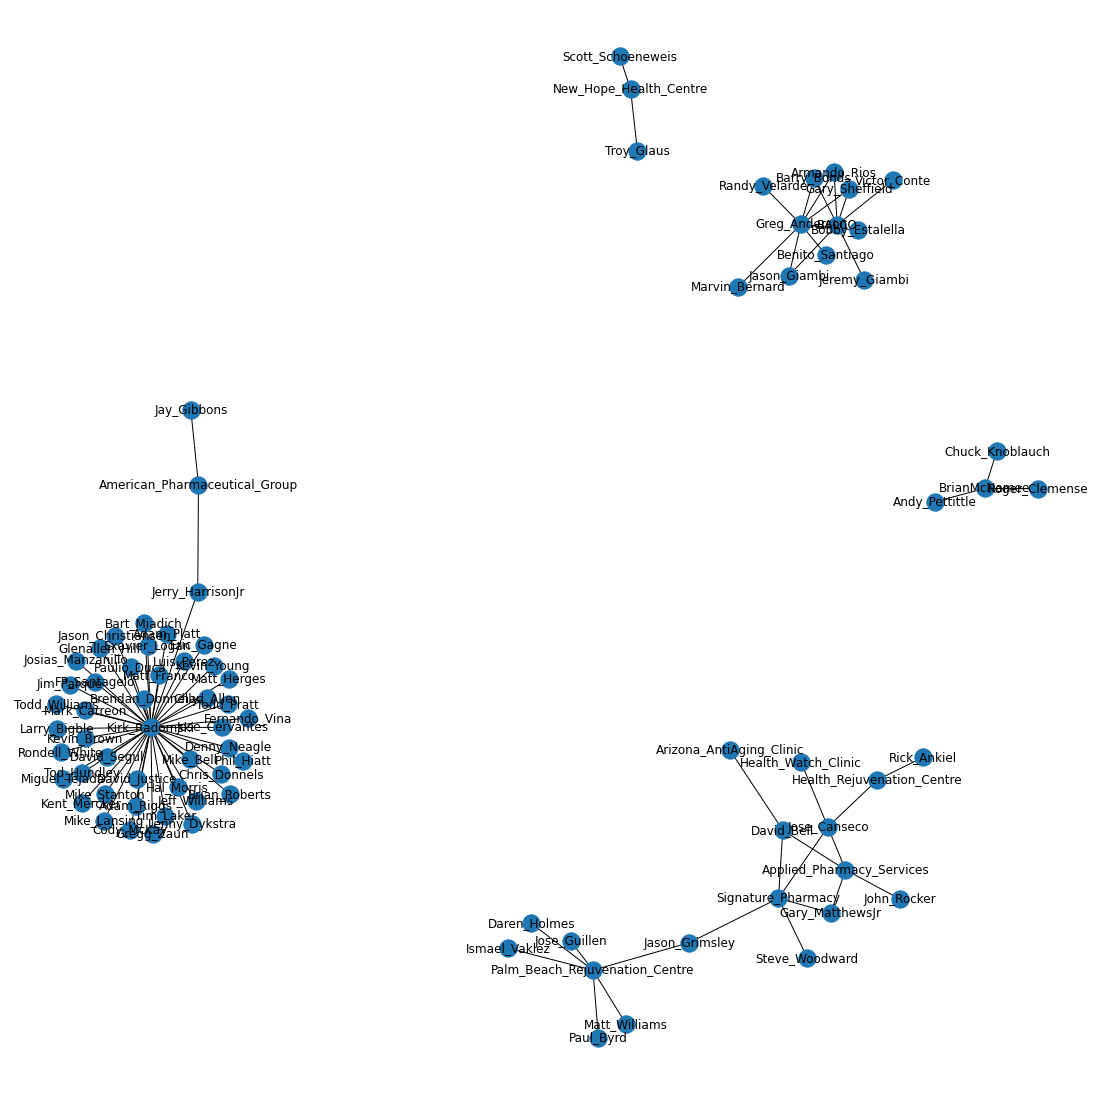

In [22]:
plt.figure(figsize=(15,15))
nx.draw(G, labels=attr_dict, with_labels=True, pos=nx.fruchterman_reingold_layout(G, k =0.35, iterations =120 ) )

# Section 2 - Part 2 - bipartite networks

A subgraph is a subset of the nodes of a network, and all of the edges linking these nodes. Any group of nodes can form a subgraph—and further down we will describe several interesting ways to use this.

Component subgraphs (or simply components) are portions of the network that are disconnected from each other. 
Many real networks have multiple components.

NetworkX has a function for isolating connected components (connected_component_subgraphs(e)); the function returns an array of Graph objects corresponding to each of the connected components:



# S[0]

In [23]:
#finding every connected graphs in the whole network
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]

In [24]:
len(S)

5

In [25]:
s = S[0].edges()
print(s)

[(52, 11), (77, 11), (65, 11), (45, 11), (53, 11), (42, 11), (47, 11), (62, 11), (82, 11), (40, 11), (43, 11), (79, 11), (55, 11), (71, 11), (50, 11), (70, 11), (69, 11), (83, 11), (76, 11), (74, 11), (57, 11), (80, 11), (49, 11), (75, 11), (11, 41), (11, 44), (11, 46), (11, 48), (11, 51), (11, 54), (11, 56), (11, 58), (11, 59), (11, 60), (11, 61), (11, 63), (11, 64), (11, 66), (11, 67), (11, 68), (11, 72), (11, 73), (11, 78), (11, 81), (35, 5), (44, 5)]


In [26]:
# Now, we have 4 two mode directed networks from the whole network
nx.is_connected(S[2])

True

In [27]:
[len(x) for x in S]

[47, 4, 12, 18, 3]

In [28]:
len(S[0])

47

In [29]:
nx.is_connected(S[0])

True

In [30]:
s_1 = [list(l) for l in s]
s_1

[[52, 11],
 [77, 11],
 [65, 11],
 [45, 11],
 [53, 11],
 [42, 11],
 [47, 11],
 [62, 11],
 [82, 11],
 [40, 11],
 [43, 11],
 [79, 11],
 [55, 11],
 [71, 11],
 [50, 11],
 [70, 11],
 [69, 11],
 [83, 11],
 [76, 11],
 [74, 11],
 [57, 11],
 [80, 11],
 [49, 11],
 [75, 11],
 [11, 41],
 [11, 44],
 [11, 46],
 [11, 48],
 [11, 51],
 [11, 54],
 [11, 56],
 [11, 58],
 [11, 59],
 [11, 60],
 [11, 61],
 [11, 63],
 [11, 64],
 [11, 66],
 [11, 67],
 [11, 68],
 [11, 72],
 [11, 73],
 [11, 78],
 [11, 81],
 [35, 5],
 [44, 5]]

In [31]:
s_1 = [[item[0], attr_dict[item[1]]] for item in s_1]
s_1

[[52, 'Kirk_Radomski'],
 [77, 'Kirk_Radomski'],
 [65, 'Kirk_Radomski'],
 [45, 'Kirk_Radomski'],
 [53, 'Kirk_Radomski'],
 [42, 'Kirk_Radomski'],
 [47, 'Kirk_Radomski'],
 [62, 'Kirk_Radomski'],
 [82, 'Kirk_Radomski'],
 [40, 'Kirk_Radomski'],
 [43, 'Kirk_Radomski'],
 [79, 'Kirk_Radomski'],
 [55, 'Kirk_Radomski'],
 [71, 'Kirk_Radomski'],
 [50, 'Kirk_Radomski'],
 [70, 'Kirk_Radomski'],
 [69, 'Kirk_Radomski'],
 [83, 'Kirk_Radomski'],
 [76, 'Kirk_Radomski'],
 [74, 'Kirk_Radomski'],
 [57, 'Kirk_Radomski'],
 [80, 'Kirk_Radomski'],
 [49, 'Kirk_Radomski'],
 [75, 'Kirk_Radomski'],
 [11, 'Todd_Pratt'],
 [11, 'Jerry_HarrisonJr'],
 [11, 'Matt_Herges'],
 [11, 'Matt_Franco'],
 [11, 'Fernando_Vina'],
 [11, 'Eric_Gagne'],
 [11, 'Brendan_Donnelly'],
 [11, 'Cody_McKay'],
 [11, 'Mark_Carreon'],
 [11, 'Lenny_Dykstra'],
 [11, 'Rondell_White'],
 [11, 'Mike_Stanton'],
 [11, 'Todd_Williams'],
 [11, 'Jose_Cervantes'],
 [11, 'David_Justice'],
 [11, 'Adam_Platt'],
 [11, 'Gregg_Zaun'],
 [11, 'Jeff_Williams'],
 [11, 

In [32]:
s_1 = [tuple(l) for l in s_1]
s_1


[(52, 'Kirk_Radomski'),
 (77, 'Kirk_Radomski'),
 (65, 'Kirk_Radomski'),
 (45, 'Kirk_Radomski'),
 (53, 'Kirk_Radomski'),
 (42, 'Kirk_Radomski'),
 (47, 'Kirk_Radomski'),
 (62, 'Kirk_Radomski'),
 (82, 'Kirk_Radomski'),
 (40, 'Kirk_Radomski'),
 (43, 'Kirk_Radomski'),
 (79, 'Kirk_Radomski'),
 (55, 'Kirk_Radomski'),
 (71, 'Kirk_Radomski'),
 (50, 'Kirk_Radomski'),
 (70, 'Kirk_Radomski'),
 (69, 'Kirk_Radomski'),
 (83, 'Kirk_Radomski'),
 (76, 'Kirk_Radomski'),
 (74, 'Kirk_Radomski'),
 (57, 'Kirk_Radomski'),
 (80, 'Kirk_Radomski'),
 (49, 'Kirk_Radomski'),
 (75, 'Kirk_Radomski'),
 (11, 'Todd_Pratt'),
 (11, 'Jerry_HarrisonJr'),
 (11, 'Matt_Herges'),
 (11, 'Matt_Franco'),
 (11, 'Fernando_Vina'),
 (11, 'Eric_Gagne'),
 (11, 'Brendan_Donnelly'),
 (11, 'Cody_McKay'),
 (11, 'Mark_Carreon'),
 (11, 'Lenny_Dykstra'),
 (11, 'Rondell_White'),
 (11, 'Mike_Stanton'),
 (11, 'Todd_Williams'),
 (11, 'Jose_Cervantes'),
 (11, 'David_Justice'),
 (11, 'Adam_Platt'),
 (11, 'Gregg_Zaun'),
 (11, 'Jeff_Williams'),
 (11, 

In [33]:
def replace(list, dictionary):
    return [attr_dict.get(item, item) for item in list]
d = replace(S[0].nodes(),attr_dict)
print(d)

['Chad_Allen', 'Mike_Lansing', 'Josias_Manzanillo', 'Jason_Christiansen', 'Larry_Bigble', 'Tod_Hundley', 'David_Segul', 'FP_Santagelo', 'Phil_Hiatt', 'Brian_Roberts', 'Kent_Mercker', 'Mike_Bell', 'Paulio_Duca', 'Luis_Perez', 'Exavier_Logan', 'Kevin_Brown', 'Miguel_Tejada', 'Denny_Neagle', 'Hal_Morris', 'Kevin_Young', 'Chris_Donnels', 'Bart_Miadich', 'Adam_Riggs', 'Tim_Laker', 'Kirk_Radomski', 'Rondell_White', 'Todd_Pratt', 'Fernando_Vina', 'Cody_McKay', 'Jeff_Williams', 'Matt_Franco', 'Mark_Carreon', 'Matt_Herges', 'Jay_Gibbons', 'Jose_Cervantes', 'Jim_Parque', 'Mike_Stanton', 'David_Justice', 'Lenny_Dykstra', 'Brendan_Donnelly', 'Adam_Platt', 'Jerry_HarrisonJr', 'Todd_Williams', 'Eric_Gagne', 'Gregg_Zaun', 'American_Pharmaceutical_Group', 'Glenallen_Hill']


In [34]:
S[0].clear()


In [35]:
S[0].nodes()

NodeView(())

In [36]:
S[0].edges()

EdgeView([])

In [37]:
S[0].add_nodes_from(d)

In [38]:
S[0].add_edges_from(s_1)

In [39]:
S[0].nodes()

NodeView(('Chad_Allen', 'Mike_Lansing', 'Josias_Manzanillo', 'Jason_Christiansen', 'Larry_Bigble', 'Tod_Hundley', 'David_Segul', 'FP_Santagelo', 'Phil_Hiatt', 'Brian_Roberts', 'Kent_Mercker', 'Mike_Bell', 'Paulio_Duca', 'Luis_Perez', 'Exavier_Logan', 'Kevin_Brown', 'Miguel_Tejada', 'Denny_Neagle', 'Hal_Morris', 'Kevin_Young', 'Chris_Donnels', 'Bart_Miadich', 'Adam_Riggs', 'Tim_Laker', 'Kirk_Radomski', 'Rondell_White', 'Todd_Pratt', 'Fernando_Vina', 'Cody_McKay', 'Jeff_Williams', 'Matt_Franco', 'Mark_Carreon', 'Matt_Herges', 'Jay_Gibbons', 'Jose_Cervantes', 'Jim_Parque', 'Mike_Stanton', 'David_Justice', 'Lenny_Dykstra', 'Brendan_Donnelly', 'Adam_Platt', 'Jerry_HarrisonJr', 'Todd_Williams', 'Eric_Gagne', 'Gregg_Zaun', 'American_Pharmaceutical_Group', 'Glenallen_Hill', 52, 77, 65, 45, 53, 42, 47, 62, 82, 40, 43, 79, 55, 71, 50, 70, 69, 83, 76, 74, 57, 80, 49, 75, 11, 35, 44))

In [40]:
nx.is_connected(S[0])


False

In [41]:
S[0].nodes()

NodeView(('Chad_Allen', 'Mike_Lansing', 'Josias_Manzanillo', 'Jason_Christiansen', 'Larry_Bigble', 'Tod_Hundley', 'David_Segul', 'FP_Santagelo', 'Phil_Hiatt', 'Brian_Roberts', 'Kent_Mercker', 'Mike_Bell', 'Paulio_Duca', 'Luis_Perez', 'Exavier_Logan', 'Kevin_Brown', 'Miguel_Tejada', 'Denny_Neagle', 'Hal_Morris', 'Kevin_Young', 'Chris_Donnels', 'Bart_Miadich', 'Adam_Riggs', 'Tim_Laker', 'Kirk_Radomski', 'Rondell_White', 'Todd_Pratt', 'Fernando_Vina', 'Cody_McKay', 'Jeff_Williams', 'Matt_Franco', 'Mark_Carreon', 'Matt_Herges', 'Jay_Gibbons', 'Jose_Cervantes', 'Jim_Parque', 'Mike_Stanton', 'David_Justice', 'Lenny_Dykstra', 'Brendan_Donnelly', 'Adam_Platt', 'Jerry_HarrisonJr', 'Todd_Williams', 'Eric_Gagne', 'Gregg_Zaun', 'American_Pharmaceutical_Group', 'Glenallen_Hill', 52, 77, 65, 45, 53, 42, 47, 62, 82, 40, 43, 79, 55, 71, 50, 70, 69, 83, 76, 74, 57, 80, 49, 75, 11, 35, 44))

In [42]:
##[(n, attr_dict[n]) for n in S[0].nodes()]

In [43]:
def get_color(k):
    if k == 0:
        return("blue")
    if k == 1:
        return("red")

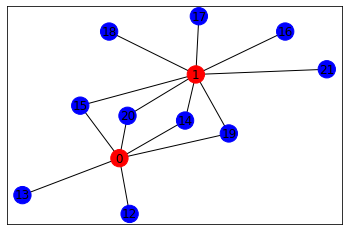

In [44]:
##### TO SHOW EACH SUBGRAPH. SIMPLY CHANGE THE VALUE OF subgraph_choice

subgraph_choice = 2
col_map = [get_color(k) for k in nx.get_node_attributes(S[subgraph_choice], "bipartite").values()]
nx.draw_networkx(S[subgraph_choice], with_labels=True, node_color=col_map)
#fig1 = matplotlib.pyplot.gcf()
#fig1.set_size_inches(15, 20)
#fig1.show()

By looking at the map above, it appears that the players taking steroids may be connected to each other. The hubs in the network above are the drug providers -- they appear to be the connectors who are controlling the process. We need to see other pictures/maps to get a better grasp of what is really happening. We take several views/pictures of social systems for the same since multiple views provide multiple insights.

Through player trades and free-agent signings, MLB does a good job of building multiple overlapping social networks. With players constantly changing teams, they form new links with new teammates, while maintaining many of their old ties to former teammates. This activity quickly creates a densely interconnected social network 

# Section 3 - part 1 - subnetworks analysis

# S[3]

In [45]:
f = S[3].edges()

In [46]:
nx.is_connected(S[3])

True

In [47]:
len(S[3])

18

In [48]:
nx.is_connected(S[3])

True

In [49]:
f_1 = [list(l) for l in f]
f_1

[[32, 4],
 [32, 7],
 [32, 8],
 [33, 4],
 [33, 6],
 [33, 7],
 [33, 9],
 [34, 7],
 [2, 22],
 [2, 23],
 [2, 24],
 [2, 25],
 [2, 26],
 [2, 27],
 [4, 27],
 [4, 30],
 [4, 31],
 [36, 6],
 [7, 31]]

In [50]:
f_1 = [[item[0], attr_dict[item[1]]] for item in f_1]
f_1

[[32, 'Signature_Pharmacy'],
 [32, 'Applied_Pharmacy_Services'],
 [32, 'Arizona_AntiAging_Clinic'],
 [33, 'Signature_Pharmacy'],
 [33, 'Health_Rejuvenation_Centre'],
 [33, 'Applied_Pharmacy_Services'],
 [33, 'Health_Watch_Clinic'],
 [34, 'Applied_Pharmacy_Services'],
 [2, 'Matt_Williams'],
 [2, 'Daren_Holmes'],
 [2, 'Paul_Byrd'],
 [2, 'Jose_Guillen'],
 [2, 'Ismael_Vaklez'],
 [2, 'Jason_Grimsley'],
 [4, 'Jason_Grimsley'],
 [4, 'Steve_Woodward'],
 [4, 'Gary_MatthewsJr'],
 [36, 'Health_Rejuvenation_Centre'],
 [7, 'Gary_MatthewsJr']]

In [51]:
f_1 = [tuple(l) for l in f_1]
f_1

[(32, 'Signature_Pharmacy'),
 (32, 'Applied_Pharmacy_Services'),
 (32, 'Arizona_AntiAging_Clinic'),
 (33, 'Signature_Pharmacy'),
 (33, 'Health_Rejuvenation_Centre'),
 (33, 'Applied_Pharmacy_Services'),
 (33, 'Health_Watch_Clinic'),
 (34, 'Applied_Pharmacy_Services'),
 (2, 'Matt_Williams'),
 (2, 'Daren_Holmes'),
 (2, 'Paul_Byrd'),
 (2, 'Jose_Guillen'),
 (2, 'Ismael_Vaklez'),
 (2, 'Jason_Grimsley'),
 (4, 'Jason_Grimsley'),
 (4, 'Steve_Woodward'),
 (4, 'Gary_MatthewsJr'),
 (36, 'Health_Rejuvenation_Centre'),
 (7, 'Gary_MatthewsJr')]

In [52]:
def replace(list, dictionary):
    return [attr_dict.get(item, item) for item in list]
j = replace(S[3].nodes(),attr_dict)
print(j)

['David_Bell', 'Jose_Canseco', 'John_Rocker', 'Palm_Beach_Rejuvenation_Centre', 'Signature_Pharmacy', 'Rick_Ankiel', 'Health_Rejuvenation_Centre', 'Applied_Pharmacy_Services', 'Arizona_AntiAging_Clinic', 'Health_Watch_Clinic', 'Matt_Williams', 'Daren_Holmes', 'Paul_Byrd', 'Jose_Guillen', 'Ismael_Vaklez', 'Jason_Grimsley', 'Steve_Woodward', 'Gary_MatthewsJr']


In [53]:
S[3].clear()

In [54]:
S[3].nodes()

NodeView(())

In [55]:
S[3].edges()

EdgeView([])

In [56]:
S[3].add_nodes_from(d)

In [57]:
S[3].add_edges_from(s_1)

In [58]:
#nx.is_connected(S[3])

<ipython-input-59-6b05b4371e77>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


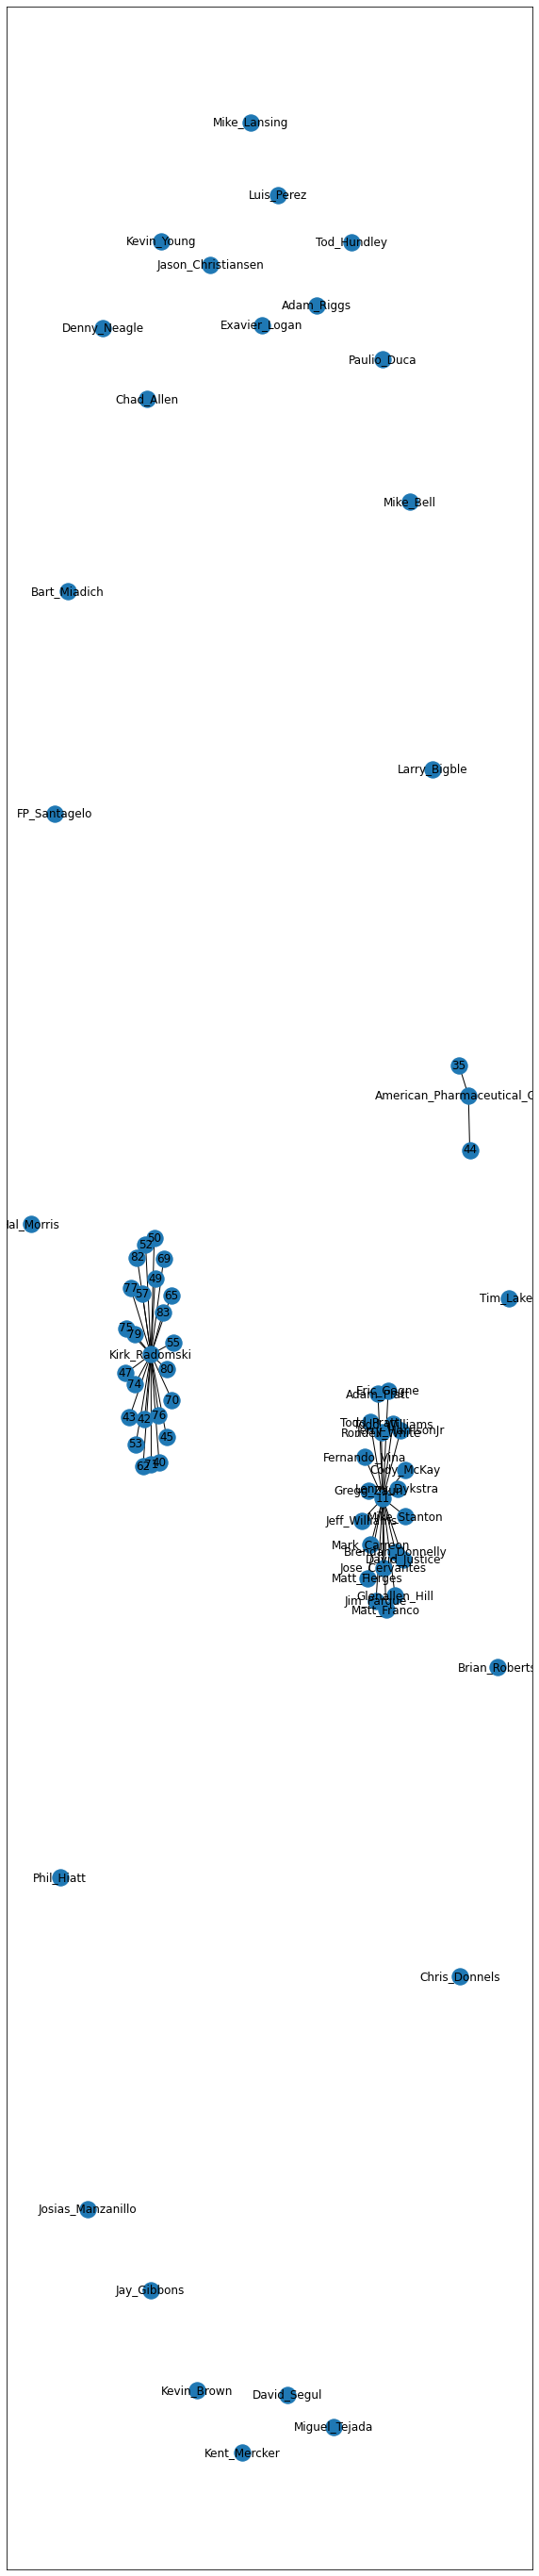

In [59]:
nx.draw_networkx(S[3],with_labels=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 50)
fig.show()


# Section 3 - part 2 - subnetworks analysis

# S[0] 

In graph theory and computer science, an adjacency matrix is a square matrix used to represent a finite graph. The elements of the matrix indicate whether pairs of vertices are adjacent or not in the graph. In the special case of a finite simple graph, the adjacency matrix is a-matrix with zeros on its diagonal.

In [60]:
# Representing the two mode network in matrix
A = nx.adjacency_matrix(S[0])
A

<74x74 sparse matrix of type '<class 'numpy.intc'>'
	with 92 stored elements in Compressed Sparse Row format>

In [61]:
print(A)

  (24, 47)	1
  (24, 48)	1
  (24, 49)	1
  (24, 50)	1
  (24, 51)	1
  (24, 52)	1
  (24, 53)	1
  (24, 54)	1
  (24, 55)	1
  (24, 56)	1
  (24, 57)	1
  (24, 58)	1
  (24, 59)	1
  (24, 60)	1
  (24, 61)	1
  (24, 62)	1
  (24, 63)	1
  (24, 64)	1
  (24, 65)	1
  (24, 66)	1
  (24, 67)	1
  (24, 68)	1
  (24, 69)	1
  (24, 70)	1
  (25, 71)	1
  :	:
  (68, 24)	1
  (69, 24)	1
  (70, 24)	1
  (71, 25)	1
  (71, 26)	1
  (71, 27)	1
  (71, 28)	1
  (71, 29)	1
  (71, 30)	1
  (71, 31)	1
  (71, 32)	1
  (71, 34)	1
  (71, 35)	1
  (71, 36)	1
  (71, 37)	1
  (71, 38)	1
  (71, 39)	1
  (71, 40)	1
  (71, 41)	1
  (71, 42)	1
  (71, 43)	1
  (71, 44)	1
  (71, 46)	1
  (72, 45)	1
  (73, 45)	1


In [62]:
# labeling every islands on the two mode network
#def label_island(lst):
#    label =[]
#    for i in lst:
#        a = [n for n in G.neighbors(i)]
 #       label.append(a)
  #  return label
#
#label_island(S[0].nodes)

# S[1]

In [63]:
# Representing the two mode network in matrix
B = nx.adjacency_matrix(S[1])
B

<4x4 sparse matrix of type '<class 'numpy.intc'>'
	with 6 stored elements in Compressed Sparse Row format>

In [64]:
print(B)

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (1, 0)	1
  (2, 0)	1
  (3, 0)	1


In [65]:
# labeling every islands on the two mode network
def label_island(lst):
    label =[]
    for i in lst:
        b = [n for n in G.neighbors(i)]
        label.append(b)
    return label

In [66]:
label_island(S[1].nodes)

[[37, 38, 39], [10], [10], [10]]

# Section 4 - infering subgroups analysis

Bipartite networks (or two mode networks) are a type of network in which nodes (or players) can be divided into two subsets based on the fact that there are no links between actors within each subset, only between the two. Because the performers are divided into two groups and there are no relationships between them,

 As we see in the whole undirected network, there are edges which exists between each and every nodes. Also after finding the largest two mode network from the first network, We will find other separate edges between the new nodes of the two mode network.

In [67]:
#providers on one side
#players on other side

In [68]:
# finding edges of the two mode network
print(S[0].edges)

[('Kirk_Radomski', 52), ('Kirk_Radomski', 77), ('Kirk_Radomski', 65), ('Kirk_Radomski', 45), ('Kirk_Radomski', 53), ('Kirk_Radomski', 42), ('Kirk_Radomski', 47), ('Kirk_Radomski', 62), ('Kirk_Radomski', 82), ('Kirk_Radomski', 40), ('Kirk_Radomski', 43), ('Kirk_Radomski', 79), ('Kirk_Radomski', 55), ('Kirk_Radomski', 71), ('Kirk_Radomski', 50), ('Kirk_Radomski', 70), ('Kirk_Radomski', 69), ('Kirk_Radomski', 83), ('Kirk_Radomski', 76), ('Kirk_Radomski', 74), ('Kirk_Radomski', 57), ('Kirk_Radomski', 80), ('Kirk_Radomski', 49), ('Kirk_Radomski', 75), ('Rondell_White', 11), ('Todd_Pratt', 11), ('Fernando_Vina', 11), ('Cody_McKay', 11), ('Jeff_Williams', 11), ('Matt_Franco', 11), ('Mark_Carreon', 11), ('Matt_Herges', 11), ('Jose_Cervantes', 11), ('Jim_Parque', 11), ('Mike_Stanton', 11), ('David_Justice', 11), ('Lenny_Dykstra', 11), ('Brendan_Donnelly', 11), ('Adam_Platt', 11), ('Jerry_HarrisonJr', 11), ('Todd_Williams', 11), ('Eric_Gagne', 11), ('Gregg_Zaun', 11), ('American_Pharmaceutical_G

###### These edges exists between the newly formed nodes of the two mode network. Like this, we can infer the subgroups of the two mode network.

# Conclusion
Social network researchers measure network activity for a node by using the concept of degrees -- the number of direct connections a node has. In the analysis above, we see the providers have the most direct connections in the network, making them the most active nodes in the network. 
Providers are a 'connector' or 'hub' in this network. Common wisdom in personal networks is "the more connections, the better." This is not always so. What really matters is where those connections lead to -- and how they connect the otherwise unconnected.

## Citation
V. Krebs, "The Spread of Steroids in Baseball." http://orgnet.com/steroids.html (2008)